# QueueLinkedList

In [4]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.next = None
    
    def __str__(self):
        return str(self.value)

class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def __iter__(self):
        curNode = self.head
        while curNode:
            yield curNode
            curNode = curNode.next
    

class Queue:
    def __init__(self):
        self.linkedList = LinkedList()
    
    def __str__(self):
        values = [str(x) for x in self.linkedList]
        return ' '.join(values)
    
    def enqueue(self, value):
        newNode = Node(value)
        if self.linkedList.head == None:
            self.linkedList.head = newNode
            self.linkedList.tail = newNode
        else:
            self.linkedList.tail.next = newNode
            self.linkedList.tail = newNode
    
    def isEmpty(self):
        if self.linkedList.head == None:
            return True
        else:
            return False
    
    def dequeue(self):
        if self.isEmpty():
            return "There is not any node in the Queue"
        else:
            tempNode = self.linkedList.head
            if self.linkedList.head == self.linkedList.tail:
                self.linkedList.head = None
                self.linkedList.tail = None
            else:
                self.linkedList.head = self.linkedList.head.next
            return tempNode
    
    def peek(self):
        if self.isEmpty():
            return "There is not any node in the Queue"
        else:
            return self.linkedList.head
    
    def delete(self):
        self.linkedList.head = None
        self.linkedList.tail = None




custQueue = Queue()
custQueue.enqueue(1)
custQueue.enqueue(2)
custQueue.enqueue(3)
print(custQueue)
print(custQueue.peek())
print(custQueue)

1 2 3
1
1 2 3


# Create Binary Tree

In [5]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee
rightChild = TreeNode("Cold")
newBT.leftChild = leftChild
newBT.rightChild = rightChild

# Binary Tree Traversal

There are two main categories of traversal methods: **depth-first search** & **breadth-first search**.

**Depth-first search**
- Preorder traversal
- Inorder traversal
- Post order traversal

**Breadth-first search**
- Level order traversal

## Pre-Order Traversal

**Pre Order Traversal Logic**:
1. Visit **Root Node**.
2. Visit **Left Subtree**.
3. Visit **Right Subtree**.

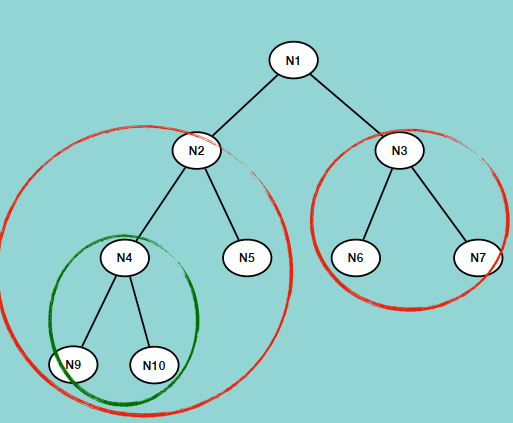

**N1 >> N2 >> N4 >> N9 >> N10 >> N5 >> N3 >> N6 >> N7**

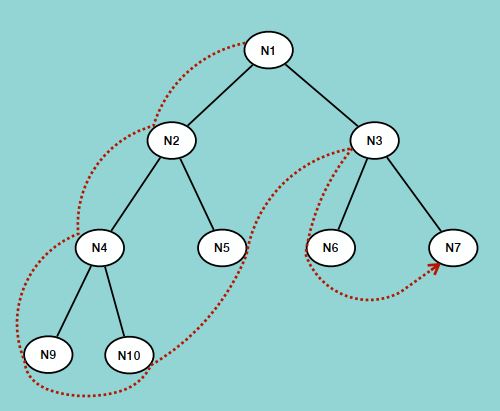

In [7]:
# Pre-Order traversal implementation
def preOrderTraversal(rootNode):
    if not rootNode:
        return
    print(rootNode.data)
    preOrderTraversal(rootNode.leftChild)
    preOrderTraversal(rootNode.rightChild)

print(preOrderTraversal(newBT))

Drinks
Hot
Tea
Coffee
Cold
None


## In-Order Traversal

**In Order Traversal Logic**:
1. Visit **Left Subtree**.
2. Visit **Root Node**.
3. Visit **Right Subtree**.

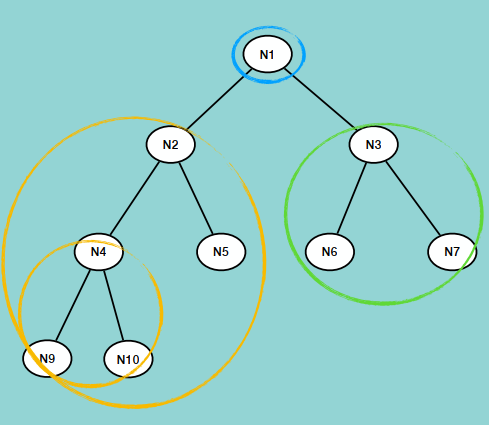

**N9 >> N4 >> N10 >> N2 >> N5 >> N1 >> N6 >> N3 >> N7**

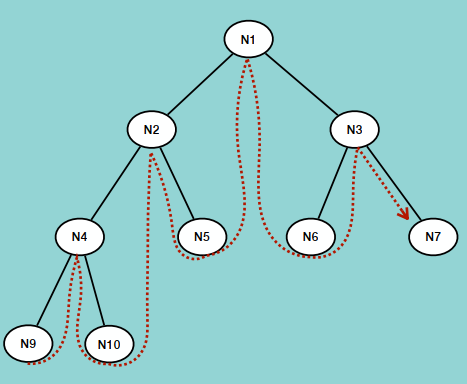

In [8]:
# In-Order traversal implementation
def inOrderTraversal(rootNode):
    if not rootNode:
        return
    inOrderTraversal(rootNode.leftChild)
    print(rootNode.data)
    inOrderTraversal(rootNode.rightChild)

print(inOrderTraversal(newBT))

Tea
Hot
Coffee
Drinks
Cold
None


## Post-Order Traversal

**Post Order Traversal Logic**:
1. Visit **Left Subtree**.
2. Visit **Right Subtree**.
3. Visit **Root Node**.

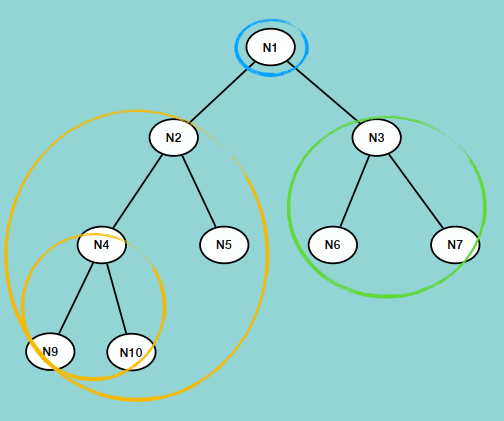

**N9 >> N10 >> N4 >> N5 >> N2 >> N6 >> N7 >> N3 >> N1**

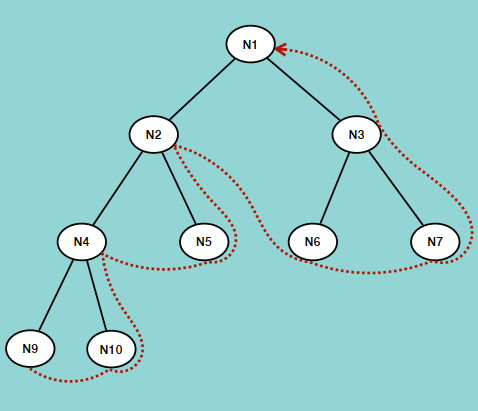

In [9]:
# Post-Order traversal implementation
def postOrderTraversal(rootNode):
    if not rootNode:
        return
    postOrderTraversal(rootNode.leftChild)
    postOrderTraversal(rootNode.rightChild)
    print(rootNode.data)

print(inOrderTraversal(newBT))

Tea
Hot
Coffee
Drinks
Cold
None


## Level-Order Traversal

**Traverse Tree Level by Level**

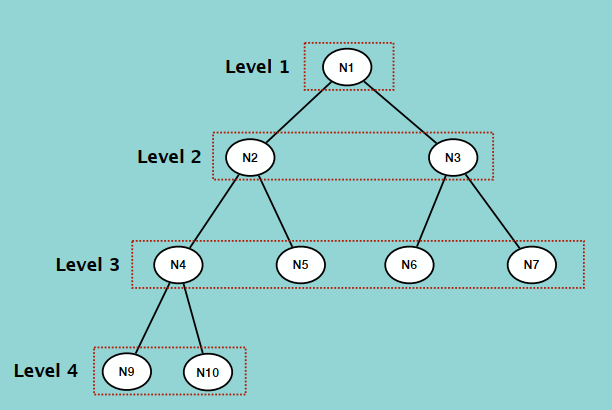

**N1 >> N2 >> N3 >> N4 >> N5 >> N6 >> N7 >> N9 >> N10**

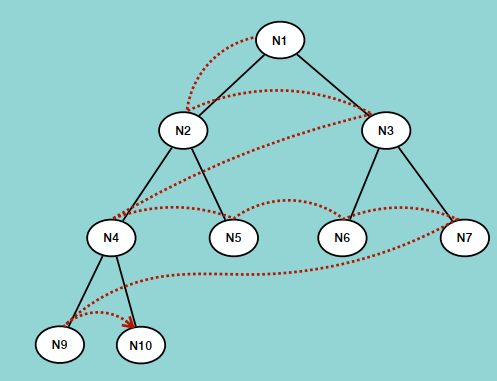

In [21]:
# Level Order Traversal Implementation

def levelOrderTraversal(rootNode):
    if not rootNode:
        return
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            print(root.value.data)
            if (root.value.leftChild is not None):
                customQueue.enqueue(root.value.leftChild)
            
            if (root.value.rightChild is not None):
                customQueue.enqueue(root.value.rightChild)


levelOrderTraversal(newBT)

Drinks
Hot
Cold
Tea
Coffee


# Searching for a node in a Binary Tree

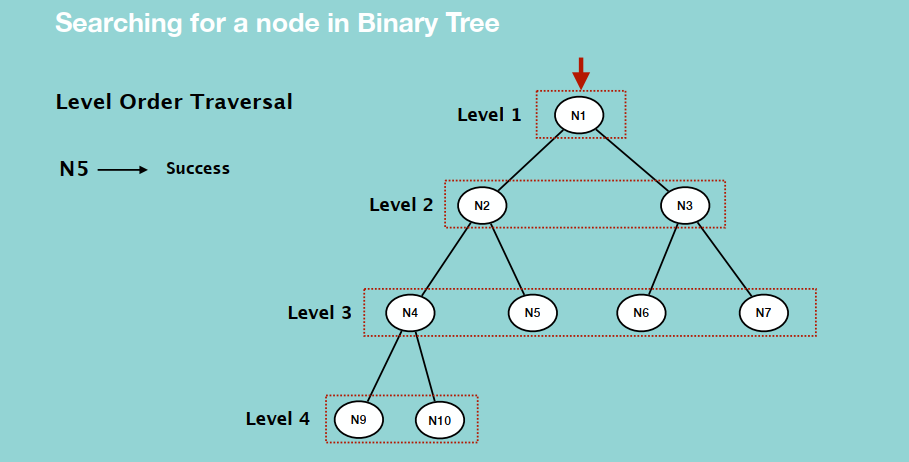

Note that for searching, we'll use **LevelOrderTraversal**.
* All other traversal methods use a recursive mechanism, i.e., using a stack indirectly.
* But, **LevelOrderTraversal** uses a Queue data structure, which is more efficient for searching.

In [22]:
# Searching a node in a Binary Tree

def searchBT(rootNode, nodeValue):
    if not rootNode:
        return "The BT does not exist"
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            if root.value.data == nodeValue:
                return "Success"
            if (root.value.leftChild is not None):
                customQueue.enqueue(root.value.leftChild)
            
            if (root.value.rightChild is not None):
                customQueue.enqueue(root.value.rightChild)
        return "Not found"

print(searchBT(newBT, "Tea"))
print(searchBT(newBT, "Beer"))

Success
Not found


# Inserting a node in a Binary Tree

* **CASE 1**: No Binary Tree exists - that is, RootNode is None.
* **CASE 2**: The Binary tree exists, and we have to look for the **first** vacant place using **LevelOrderTraversal**. 

> * *A **vacant place** refers to a Node having only one or no child, where the new node can be inserted as a child.*
> * *If a node has both left child & right child, that means there is no vacant place in that node.*

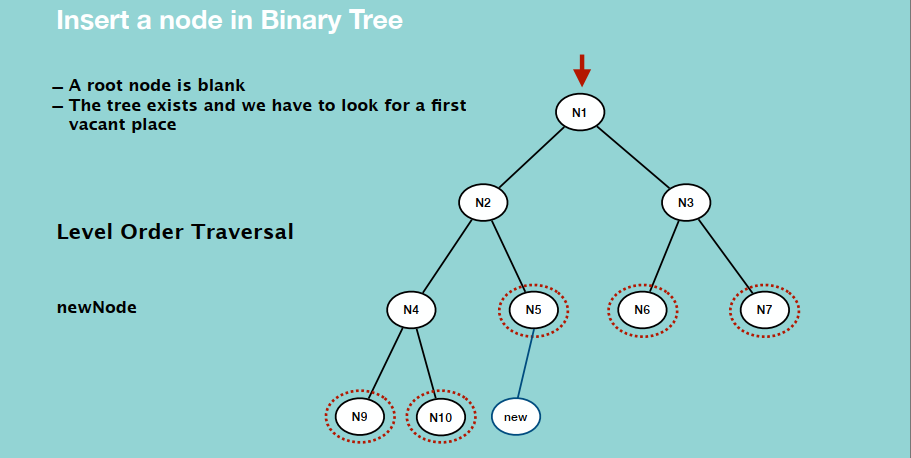

In [24]:
# Insert a new node in a binary tree

def insertNodeBT(rootNode, newNode):
    if not rootNode:
        rootNode = newNode
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            if root.value.leftChild is not None:
                customQueue.enqueue(root.value.leftChild)
            else:
                root.value.leftChild = newNode
                return "Successfully Inserted"
            if root.value.rightChild is not None:
                customQueue.enqueue(root.value.rightChild)
            else:
                root.value.rightChild = newNode
                return "Successfully Inserted"

newNode = TreeNode("Cola")
print(insertNodeBT(newBT, newNode))
levelOrderTraversal(newBT)

Successfully Inserted
Drinks
Hot
Cold
Tea
Coffee
Cola


# Deleting a node in a Binary Tree

* **CASE 1**: Value does not exist in a Binary Tree.
* **CASE 2**: Value exists in a Binary Tree.
    * Find the **deepest node** - last node in level order traversal.
    * Replace the value of the node that we want to delete with the value of the deepest node.
    * Delete the deepest node in the binary tree.

Now you might be wondering, **why we didn't delete the mentioned node itself?**
* We cannot delete the node directly, because we have other nodes depending on this node. 

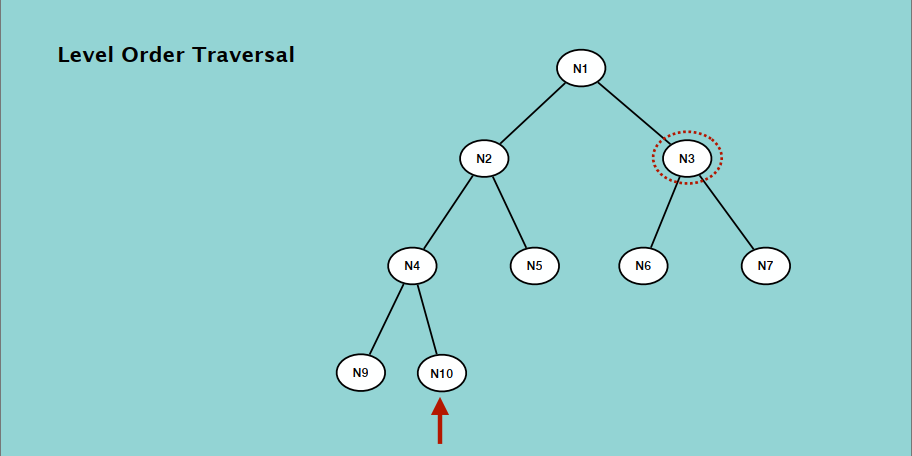

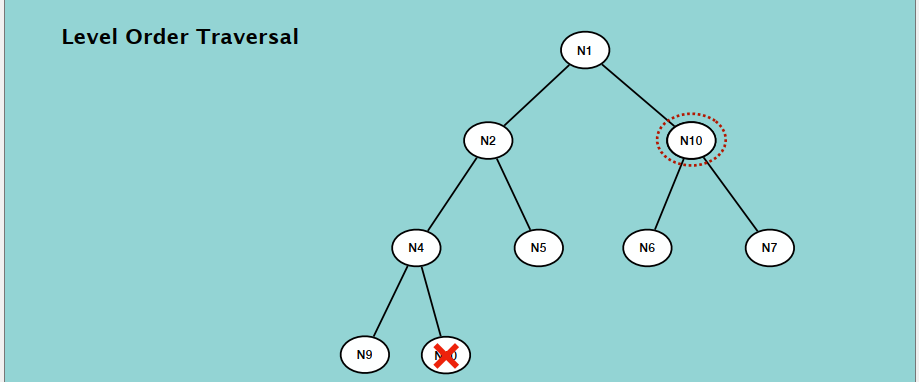

In [28]:
def getDeepestNode(rootNode):
    if not rootNode:
        return
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            if (root.value.leftChild is not None):
                customQueue.enqueue(root.value.leftChild)
            
            if (root.value.rightChild is not None):
                customQueue.enqueue(root.value.rightChild)
        deepestNode = root.value
        return deepestNode

def deleteDeepestNode(rootNode, dNode):
    if not rootNode:
        return
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            if root.value is dNode:
                root.value = None
                return
            if root.value.rightChild:
                if root.value.rightChild is dNode:
                    root.value.rightChild = None
                    return
                else:
                    customQueue.enqueue(root.value.rightChild)
            if root.value.leftChild:
                if root.value.leftChild is dNode:
                    root.value.leftChild = None
                    return
                else:
                    customQueue.enqueue(root.value.leftChild)

def deleteNodeBT(rootNode, node):
    if not rootNode:
        return "The BT does not exist"
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            if root.value.data == node:
                dNode = getDeepestNode(rootNode)
                root.value.data = dNode.data
                deleteDeepestNode(rootNode, dNode)
                return "The node has been successfully deleted"
            if (root.value.leftChild is not None):
                customQueue.enqueue(root.value.leftChild)
            
            if (root.value.rightChild is not None):
                customQueue.enqueue(root.value.rightChild)
        return "Failed to delete"

deleteNodeBT(newBT, "Cola")
levelOrderTraversal(newBT)

Drinks
Hot
Cold
Tea
Coffee


# Delete entire binary tree

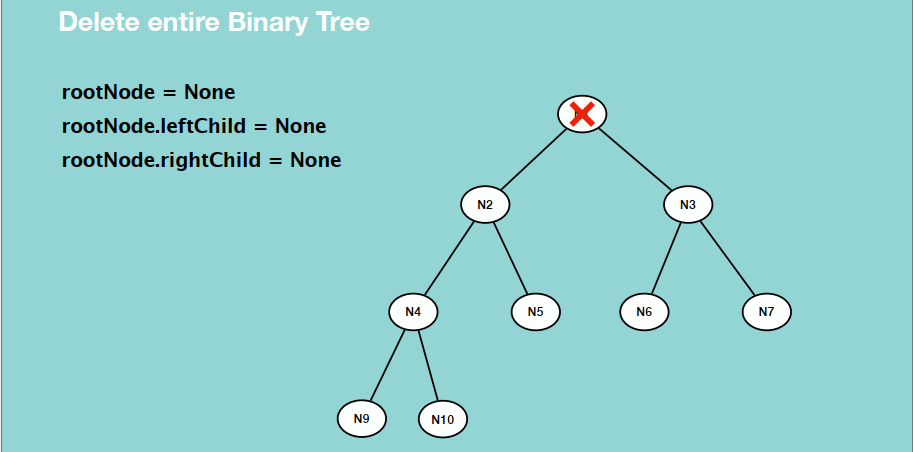

In [29]:
def deleteBT(rootNode):
    rootNode.data = None
    rootNode.leftChild = None
    rootNode.rightChild = None
    return "The BT has been successfully deleted" 

deleteBT(newBT)
levelOrderTraversal(newBT)

None
